In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\Anuj\OneDrive\Desktop\SEM 4\laptop_price - dataset.csv")

# Display basic info
print("First five rows:")
print(df.head())
print("Dataset Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))


First five rows:
  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB SSD       Intel  Iris Plus Gr


Statistics for Inches:
count    1275.000000
mean       15.022902
std         1.429470
min        10.100000
25%        14.000000
50%        15.600000
75%        15.600000
max        18.400000
Name: Inches, dtype: float64


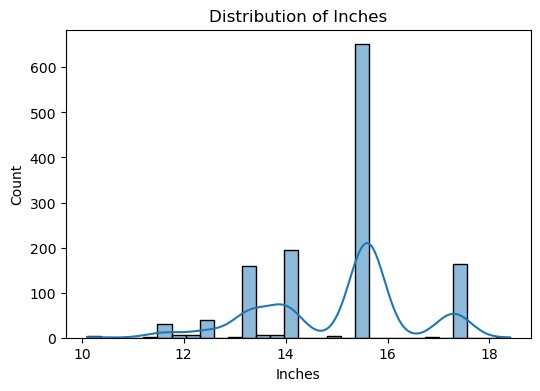


Statistics for CPU_Frequency (GHz):
count    1275.000000
mean        2.302980
std         0.503846
min         0.900000
25%         2.000000
50%         2.500000
75%         2.700000
max         3.600000
Name: CPU_Frequency (GHz), dtype: float64


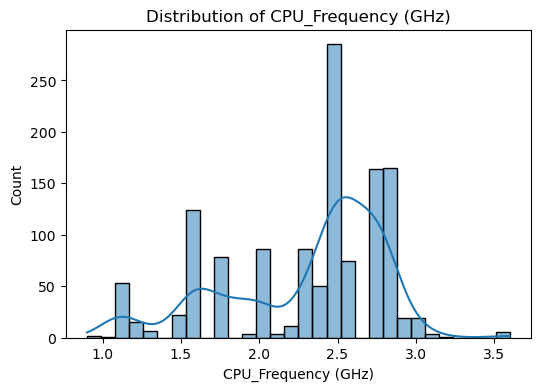


Statistics for RAM (GB):
count    1275.000000
mean        8.440784
std         5.097809
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        64.000000
Name: RAM (GB), dtype: float64


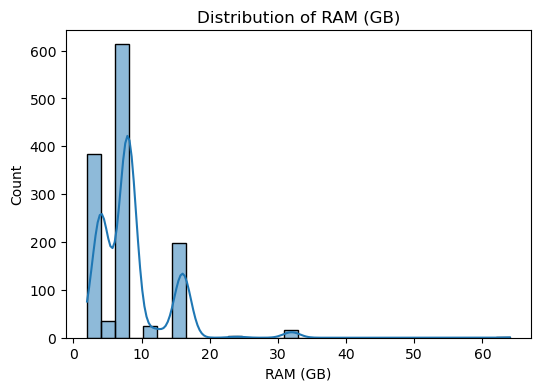


Statistics for Weight (kg):
count    1275.000000
mean        2.040525
std         0.669196
min         0.690000
25%         1.500000
50%         2.040000
75%         2.310000
max         4.700000
Name: Weight (kg), dtype: float64


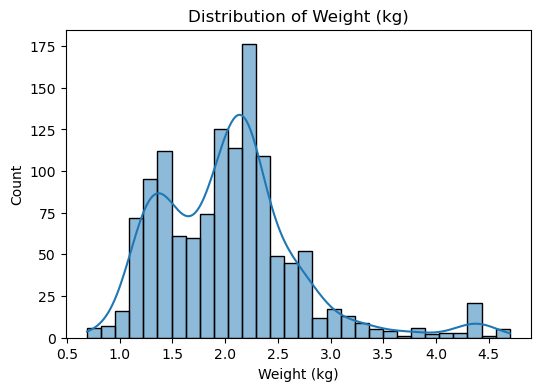


Statistics for Price (Euro):
count    1275.000000
mean     1134.969059
std       700.752504
min       174.000000
25%       609.000000
50%       989.000000
75%      1496.500000
max      6099.000000
Name: Price (Euro), dtype: float64


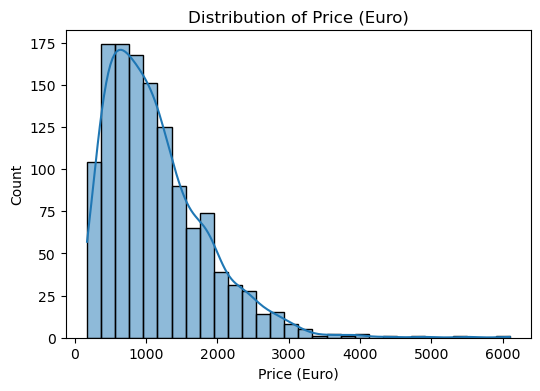

In [3]:
# UNIVARIATE ANALYSIS

# Numerical Columns
num_cols = ['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 'Price (Euro)']

for col in num_cols:
    print(f"\nStatistics for {col}:")
    print(df[col].describe())
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()



Value Counts for Company:
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64


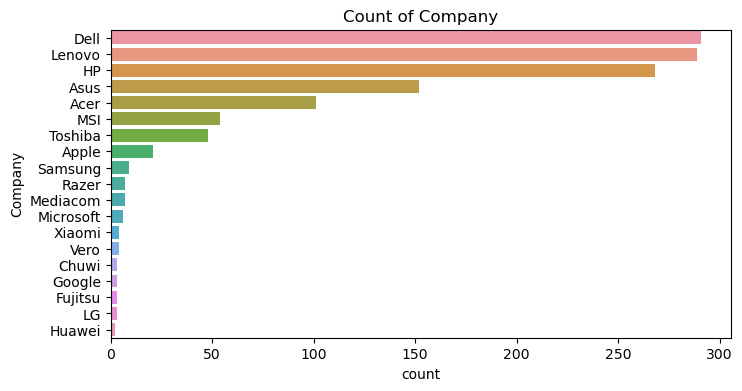


Value Counts for TypeName:
Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: TypeName, dtype: int64


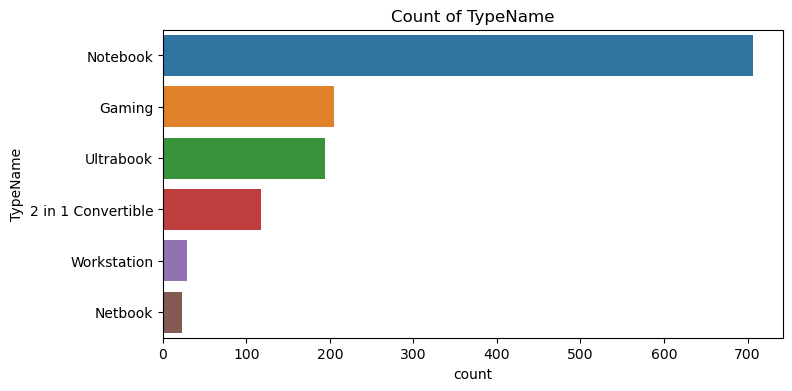


Value Counts for CPU_Company:
Intel      1214
AMD          60
Samsung       1
Name: CPU_Company, dtype: int64


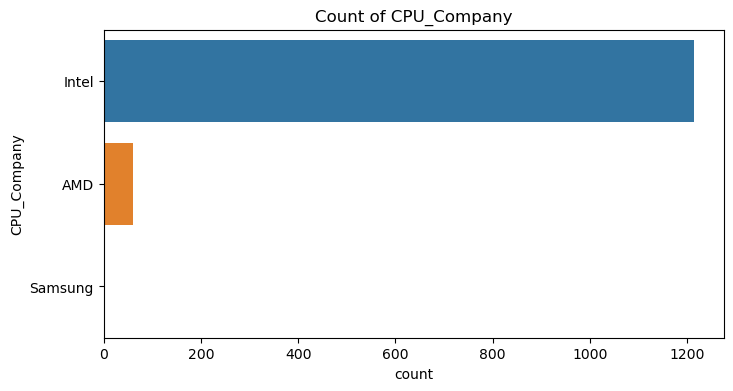


Value Counts for GPU_Company:
Intel     704
Nvidia    396
AMD       174
ARM         1
Name: GPU_Company, dtype: int64


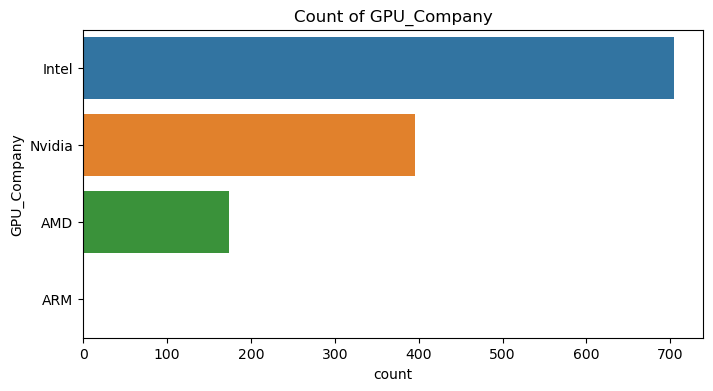


Value Counts for OpSys:
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64


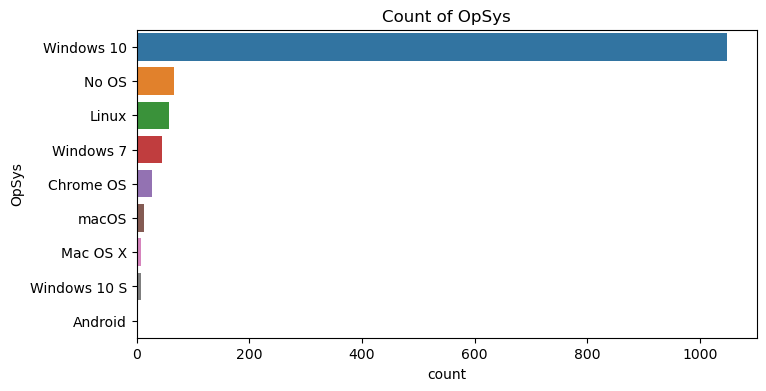

In [4]:
# Categorical Columns
cat_cols = ['Company', 'TypeName', 'CPU_Company', 'GPU_Company', 'OpSys']

for col in cat_cols:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()


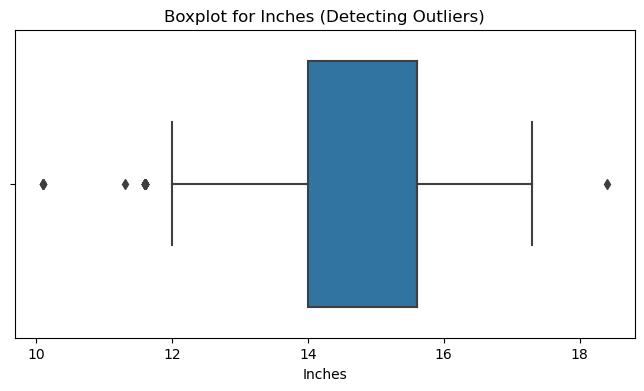

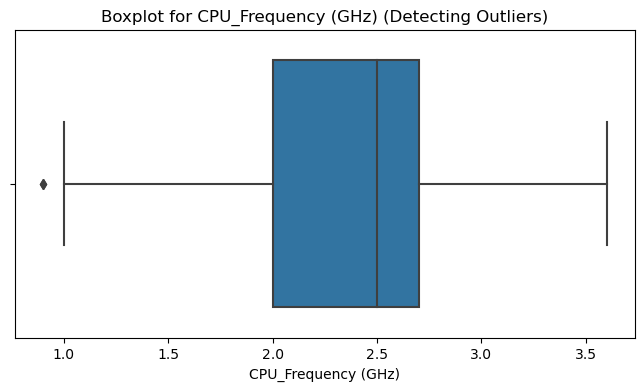

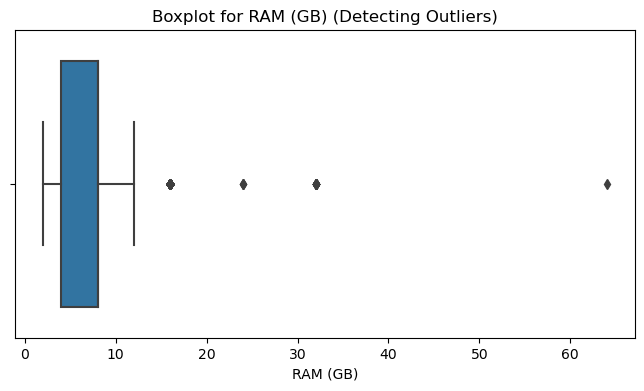

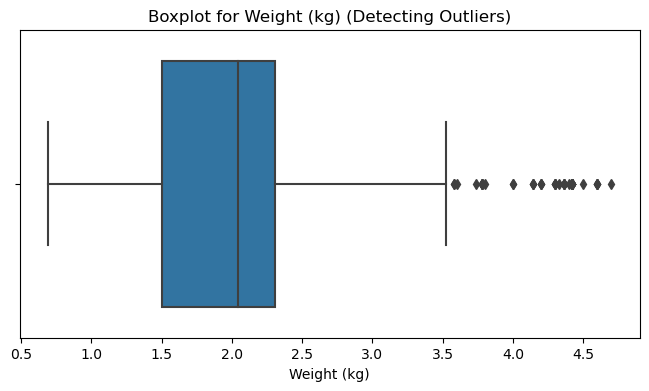

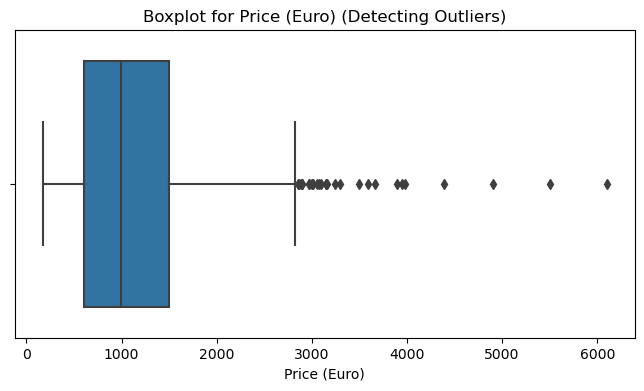


Original Data Shape: (1275, 15)
After Outlier Removal: (1224, 15)


In [5]:
# OUTLIER DETECTION

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col} (Detecting Outliers)')
    plt.show()

# Removing extreme outliers using Z-score (Threshold = 3)
df_no_outliers = df[(np.abs(zscore(df[num_cols])) < 3).all(axis=1)]

print(f"\nOriginal Data Shape: {df.shape}")
print(f"After Outlier Removal: {df_no_outliers.shape}")


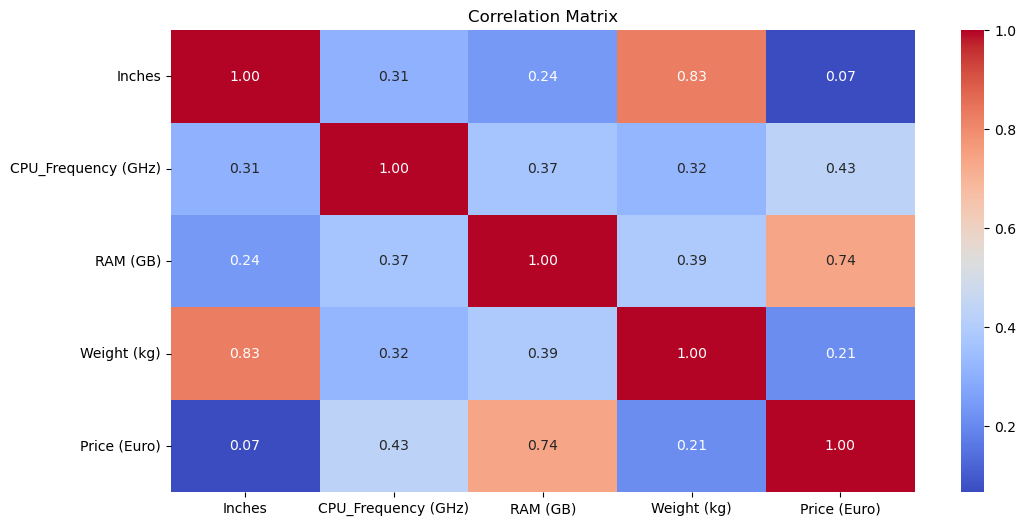

In [6]:
# MULTIVARIATE ANALYSIS

# Correlation Heatmap (only numerical columns)
plt.figure(figsize=(12, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


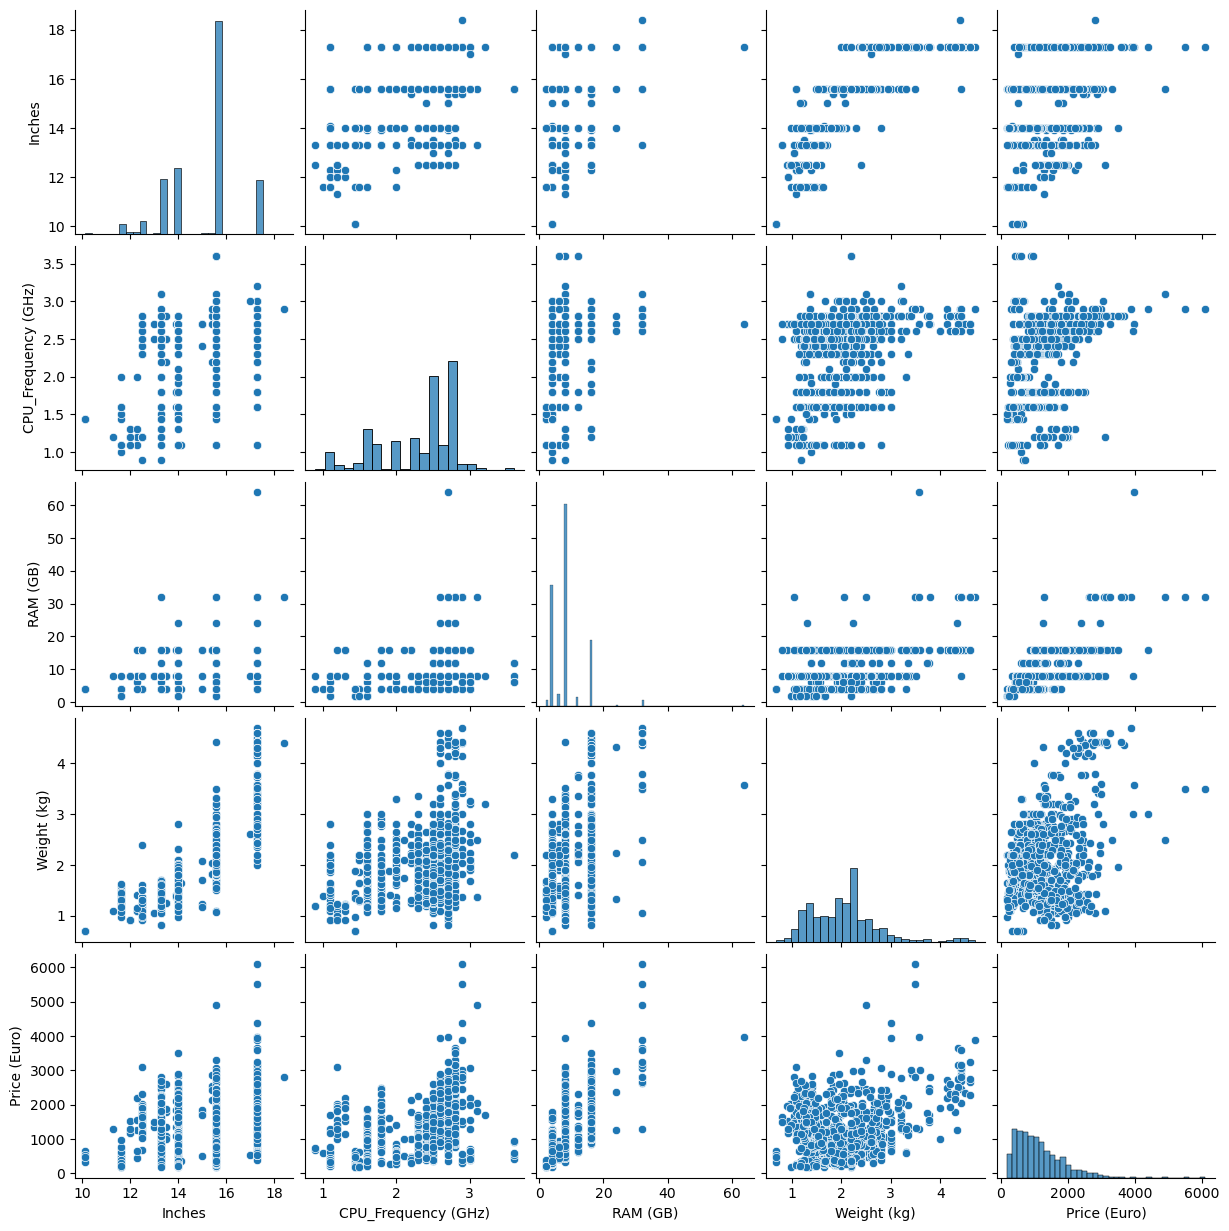

In [8]:
# Pairplot for numerical variables
if len(num_cols) > 1:
    sns.pairplot(df[num_cols])
    plt.show()


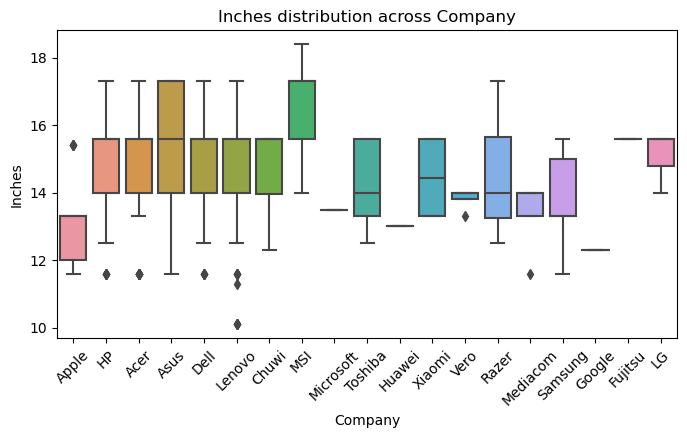

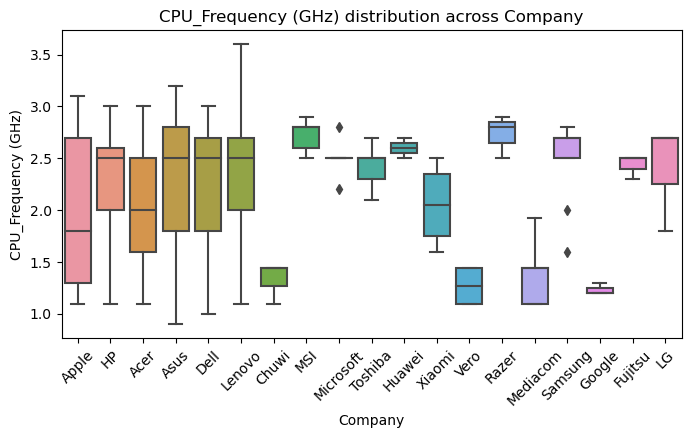

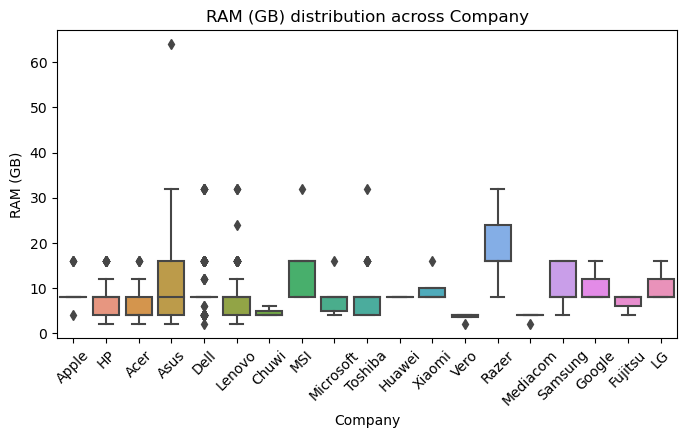

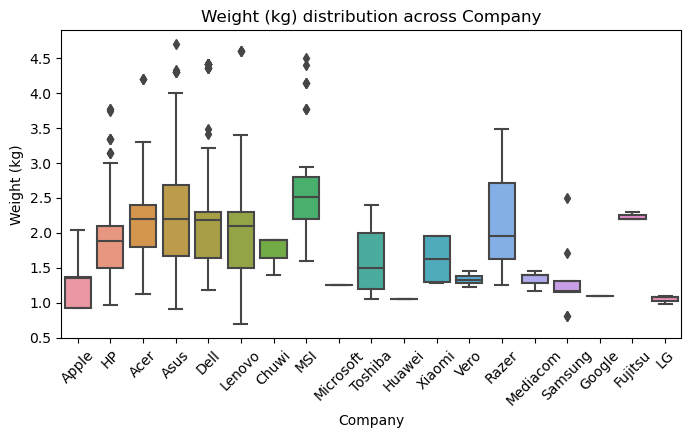

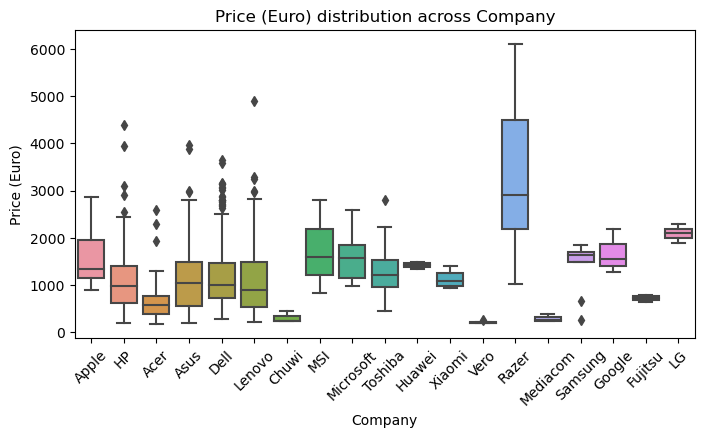

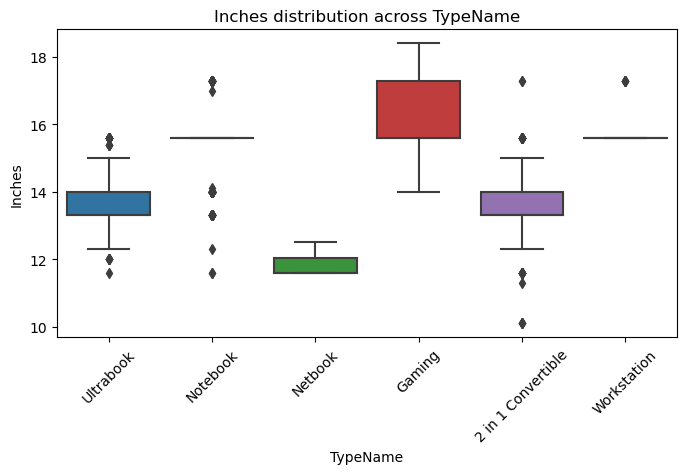

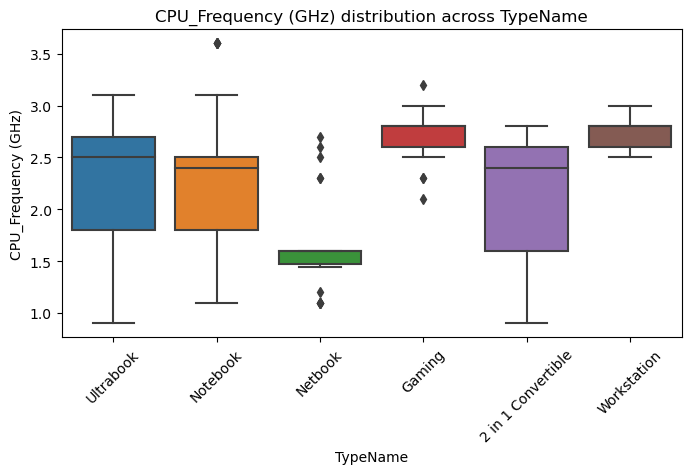

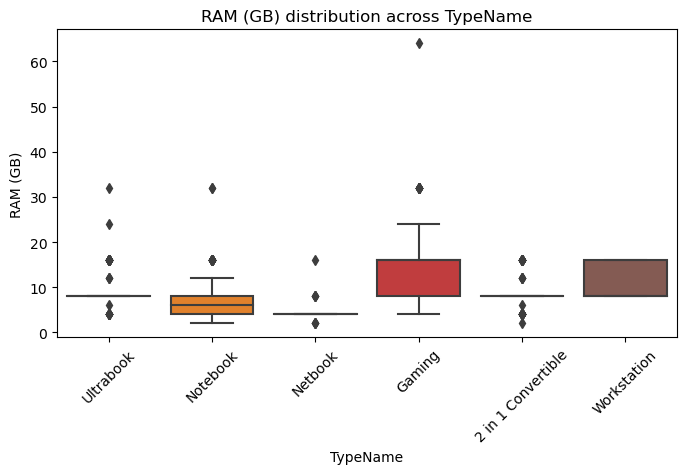

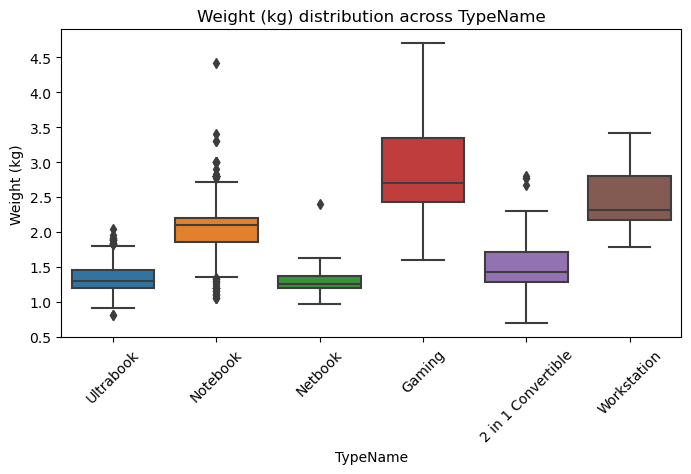

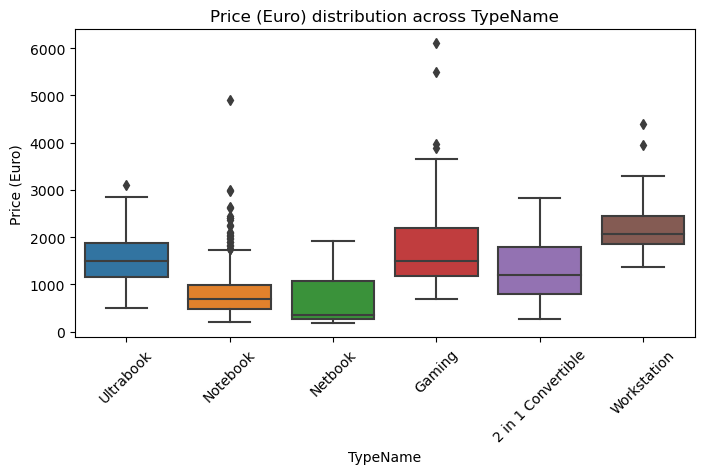

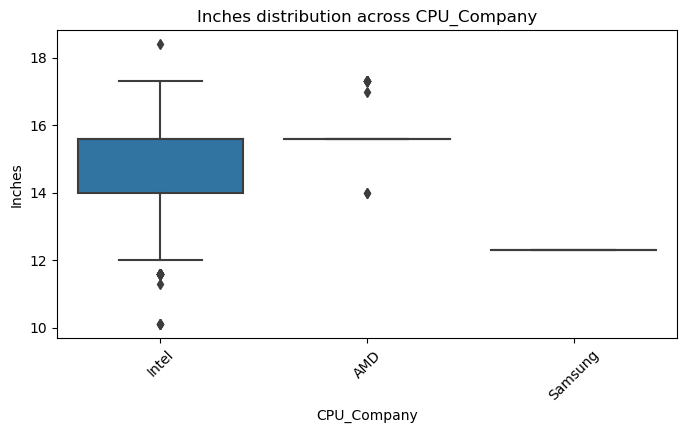

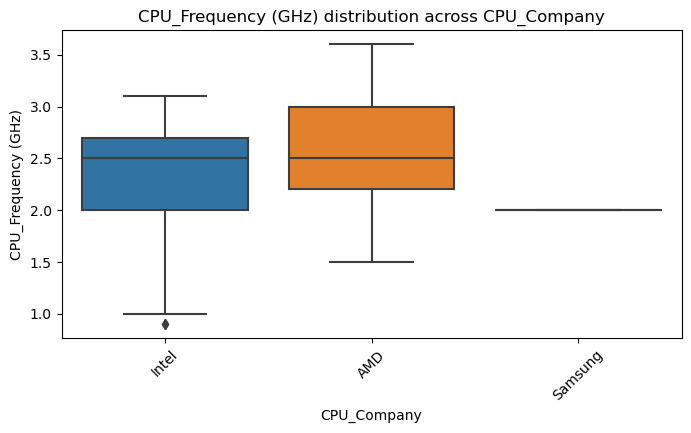

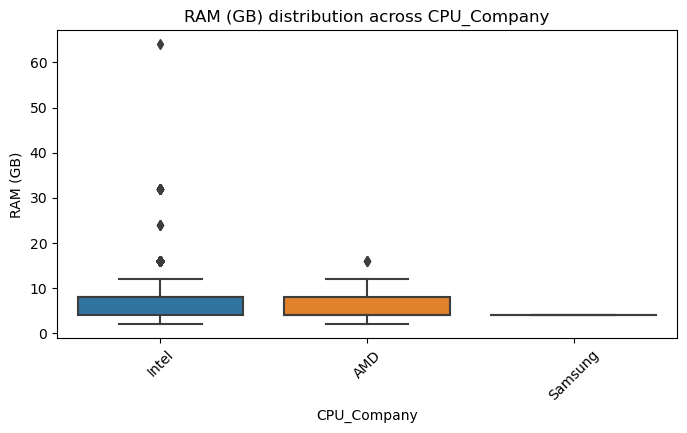

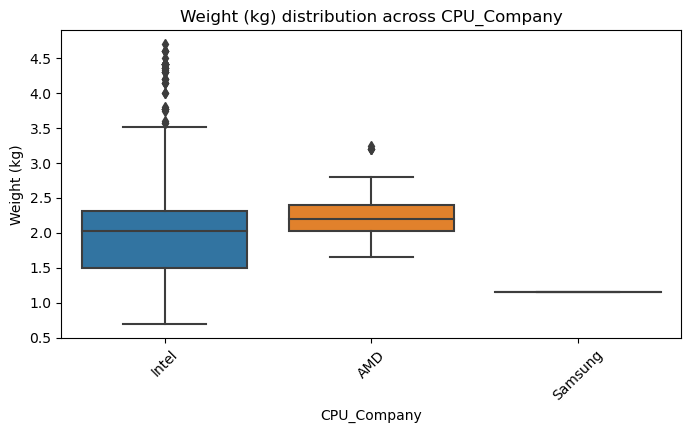

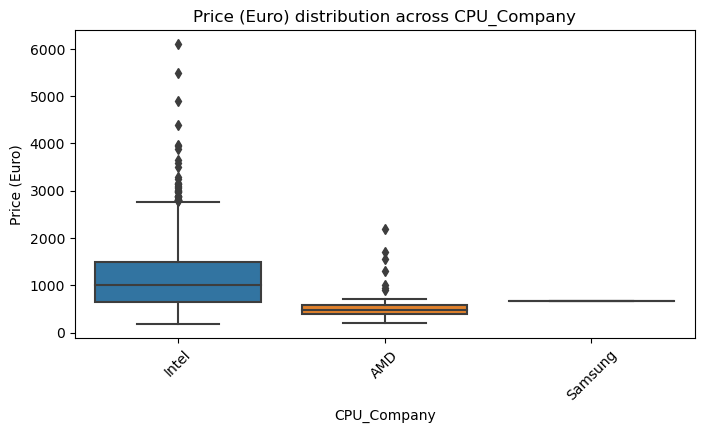

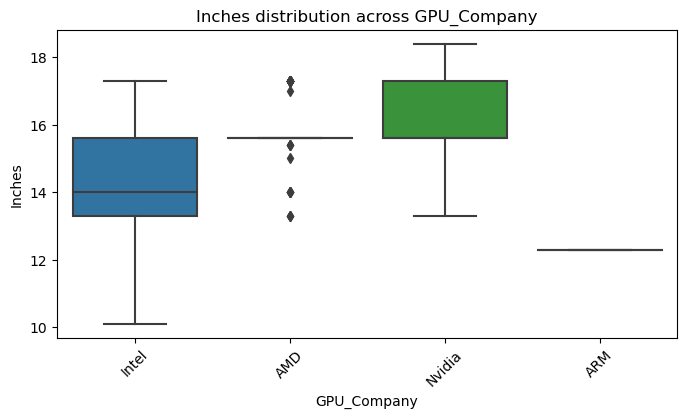

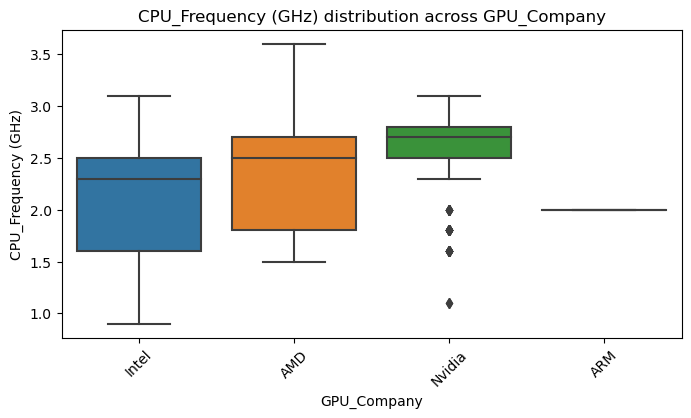

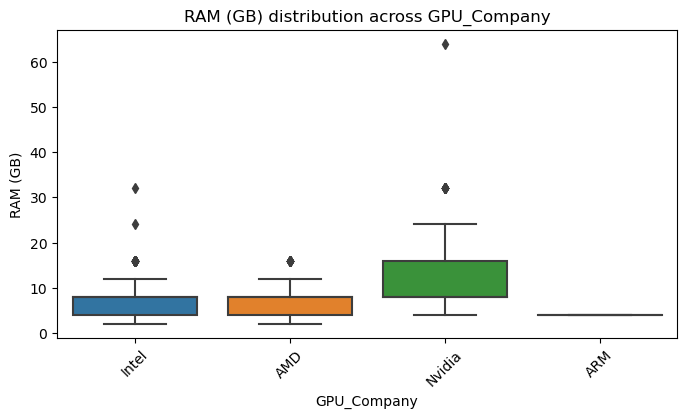

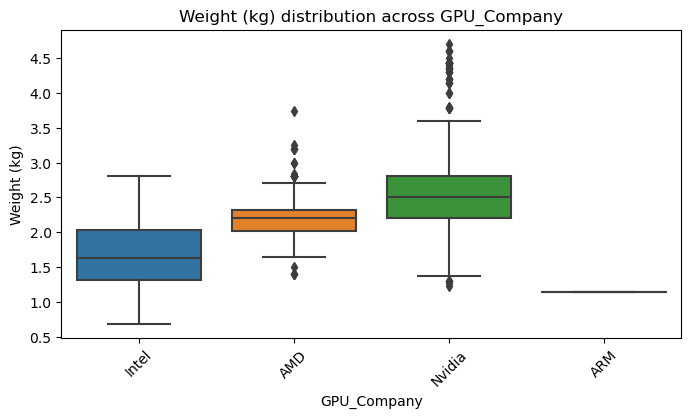

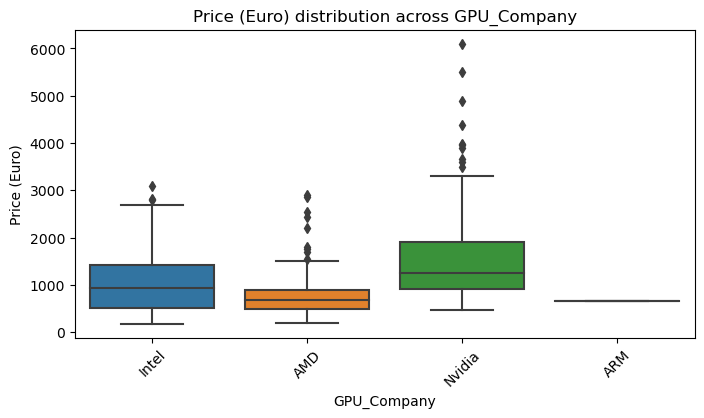

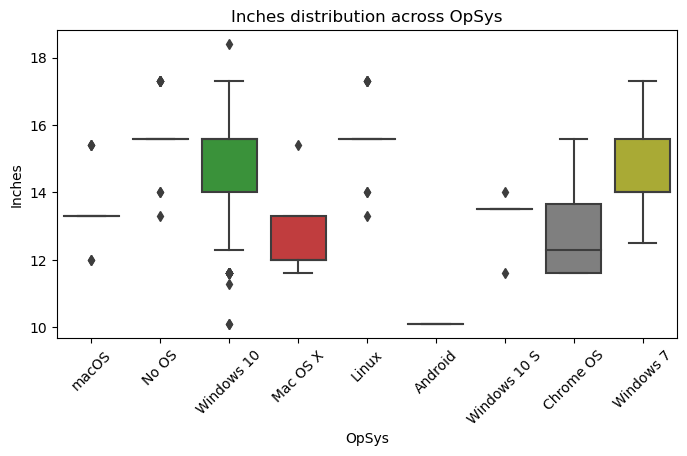

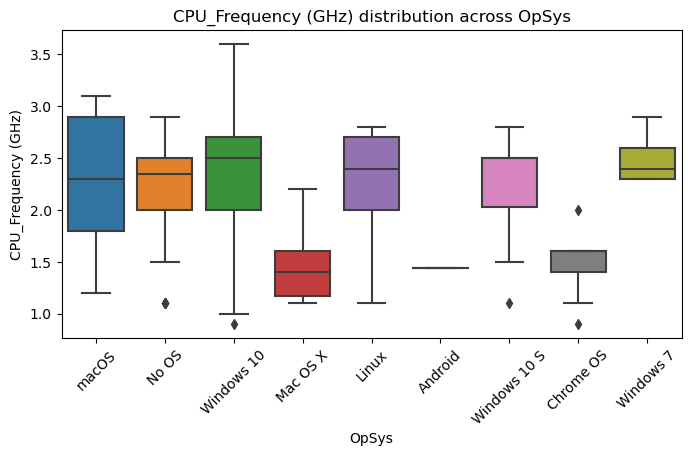

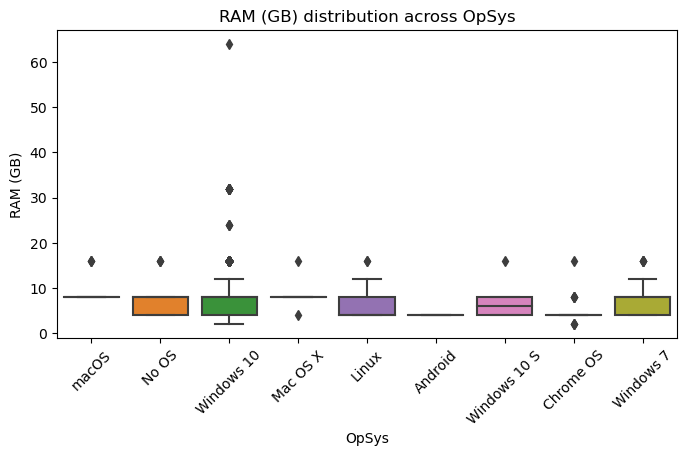

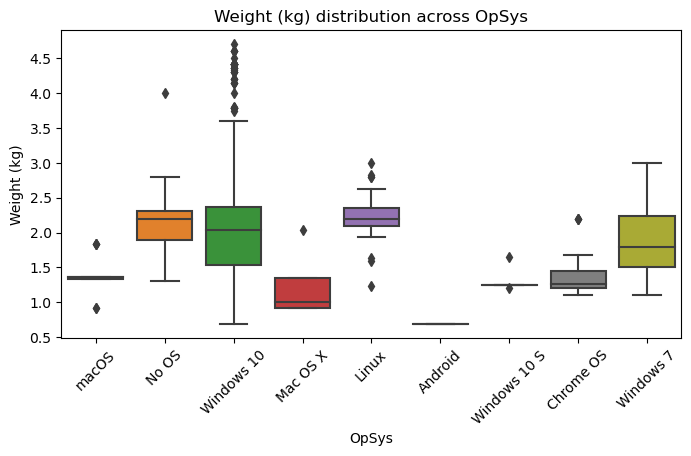

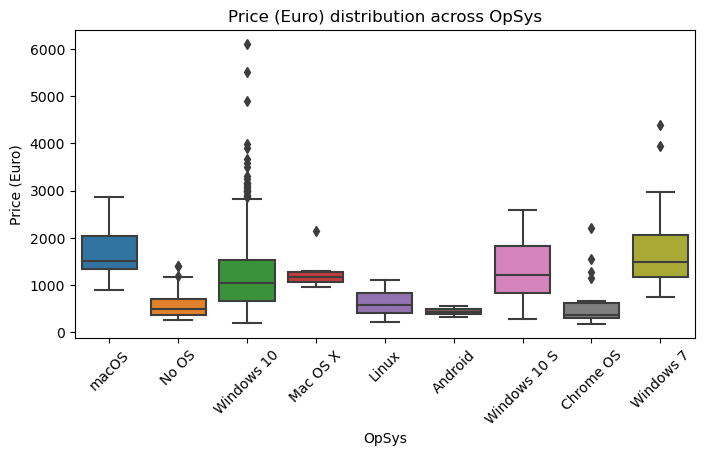

In [9]:
# Boxplot: Distribution of Numerical Variables by Categorical Variables

for cat_col in cat_cols:
    for num_col in num_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[cat_col], y=df[num_col])
        plt.xticks(rotation=45)
        plt.title(f'{num_col} distribution across {cat_col}')
        plt.show()


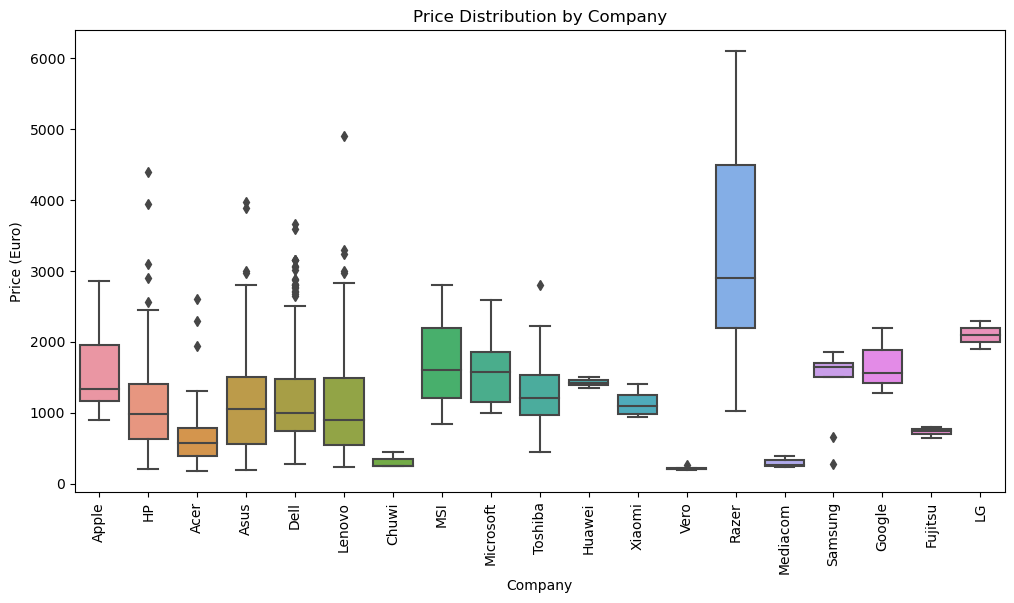

In [10]:
# ADDITIONAL ANALYSIS

# Price Trends by Company
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Company"], y=df["Price (Euro)"])
plt.title("Price Distribution by Company")
plt.xticks(rotation=90)
plt.show()


In [11]:
# Top 10 Most Expensive Laptops
print("Top 10 Most Expensive Laptops:")
print(df[['Company', 'Product', 'Price (Euro)']].sort_values(by="Price (Euro)", ascending=False).head(10))


Top 10 Most Expensive Laptops:
     Company            Product  Price (Euro)
196    Razer          Blade Pro        6099.0
830    Razer          Blade Pro        5499.0
610   Lenovo       Thinkpad P51        4899.0
749       HP           Zbook 17        4389.0
1066    Asus         ROG G701VO        3975.0
1136      HP           ZBook 17        3949.4
238     Asus  ROG G703VI-E5062T        3890.0
723     Dell       Alienware 17        3659.4
780     Dell       Alienware 17        3588.8
1231   Razer          Blade Pro        3499.0


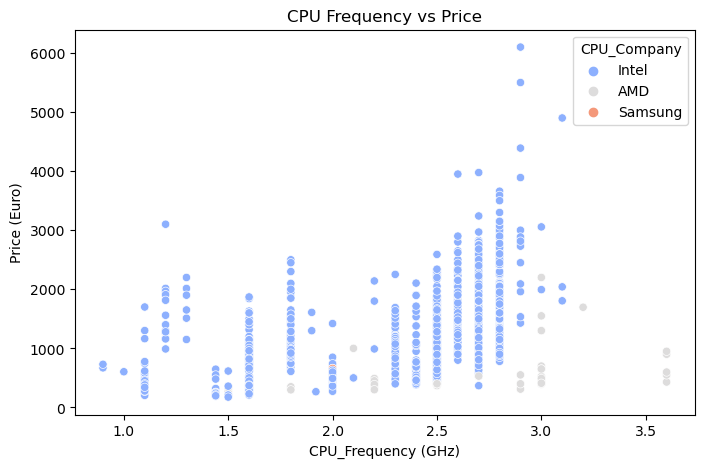

In [12]:
# CPU Frequency vs Price (Scatter Plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="CPU_Frequency (GHz)", y="Price (Euro)", hue="CPU_Company", palette="coolwarm")
plt.title("CPU Frequency vs Price")
plt.show()


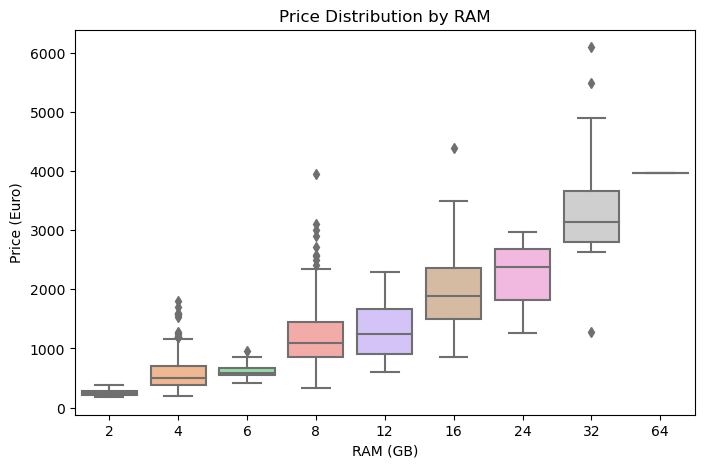

In [13]:
# RAM vs Price (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="RAM (GB)", y="Price (Euro)", palette="pastel")
plt.title("Price Distribution by RAM")
plt.show()


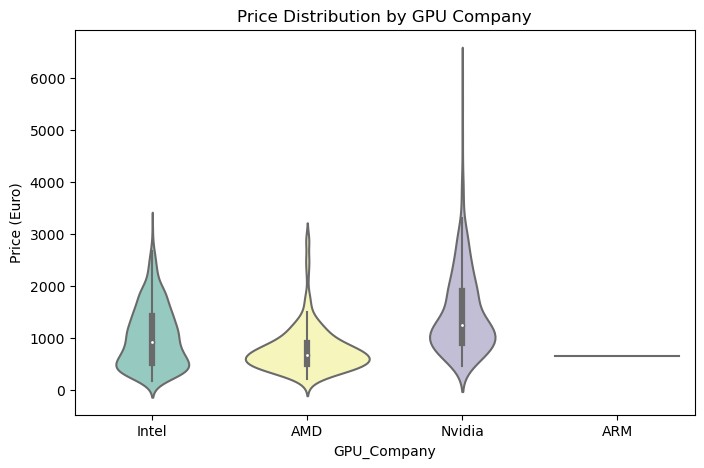

In [14]:
# GPU Type vs Price (Violin Plot)
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="GPU_Company", y="Price (Euro)", palette="Set3")
plt.title("Price Distribution by GPU Company")
plt.show()


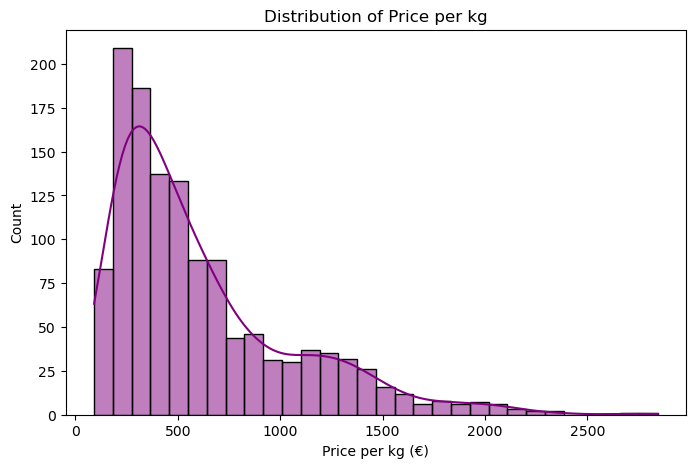

In [15]:
# Feature Engineering: Creating Price per kg

df["Price_per_kg"] = df["Price (Euro)"] / df["Weight (kg)"]
plt.figure(figsize=(8, 5))
sns.histplot(df["Price_per_kg"], kde=True, bins=30, color="purple")
plt.title("Distribution of Price per kg")
plt.xlabel("Price per kg (€)")
plt.show()
